# Project description

The task is to predict the CO2 emissions and total energy consumption of non-residential buildings in Seattle for which these values have not been measured yet.

Additionally, there is an interest in evaluating the usefulness of the "ENERGY STAR Score" for emissions prediction, as the current approach used by the team is tedious to calculate. The score will be integrated into the modeling process to assess its value.

This is the first of three notebooks documenting this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("\\2016_Building_Energy_Benchmarking.csv")
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Data Cleaning

In [6]:
# Check the shape and column names of the dataset
print("Shape of the dataset:", df.shape)
print("\n")
print("Columns of the dataset:", df.columns)

Shape of the dataset: (3376, 46)


Columns of the dataset: Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'De

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [8]:
# Count the number of categorical and numerical variables
print("Number of categorical variables:", len(df.select_dtypes(include='object').columns))
print("Number of numerical variables:", len(df.select_dtypes(exclude='object').columns))

Number of categorical variables: 15
Number of numerical variables: 31


In [9]:
# Remove columns with only one unique value
single_value_columns = df.columns[df.nunique() == 1].tolist()
df.drop(columns=single_value_columns, inplace=True)

In [10]:
# Select one variable to represent property type and remove the rest
df.drop(columns=["BuildingType", "ListOfAllPropertyUseTypes"], inplace=True)

## Non-Residential Buildings

In [11]:
# Identify residential property types using the PrimaryPropertyType variable
residential = [
    "Low-Rise Multifamily",
    "Mid-Rise Multifamily",
    "High-Rise Multifamily",
    "Hotel",
    "Senior Care Community",
    "Residence Hall"
]

In [12]:
# Filter out residential buildings based on PrimaryPropertyType
df_non_residential = df[~df["PrimaryPropertyType"].isin(residential)].copy()

In [13]:
# Filter out residential buildings based on LargestPropertyUseType
residential2 = [
    "Multifamily Housing",
    "Hotel",
    "Senior Care Community",
    "Residence Hall/Dormitory"
]
df_non_residential = df_non_residential[
    ~df_non_residential["LargestPropertyUseType"].isin(residential2)
]

In [14]:
# Recherche de types de bâtiments résidentiels selon le variable LargestPropertyUseType
df_non_residential.LargestPropertyUseType.value_counts()

Office                                                  498
Non-Refrigerated Warehouse                              199
K-12 School                                             139
Other                                                   102
Retail Store                                             99
Worship Facility                                         71
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Parking                                                  32
Other - Recreation                                       31
Self-Storage Facility                                    28
Multifamily Housing                                      25
College/University                                       25
Other - Entertainment/Public Assembly                    21
Laboratory                                               13
Restaurant                              

In [15]:
# Supprimer les bâtiments résidentiels selon LargestPropertyUseType.
residential2 = [
    "Multifamily Housing",
    "Hotel",
    "Senior Care Community",
    "Residence Hall/Dormitory",
]
df_non_residential = df_non_residential[
    ~df_non_residential["LargestPropertyUseType"].isin(residential2)
]

## Grouping Property Type Values

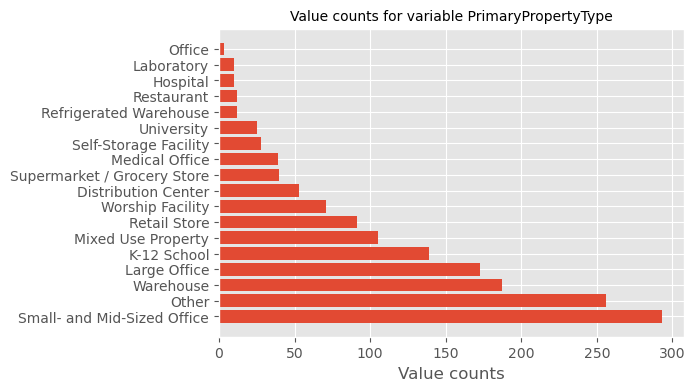

In [14]:
# Visualize the value counts for the PrimaryPropertyType variable before grouping
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
plt.barh(y=df_non_residential.PrimaryPropertyType.value_counts().index,
         width=df_non_residential.PrimaryPropertyType.value_counts().values)
plt.xlabel('Value counts')
plt.title('Value counts for variable PrimaryPropertyType', fontsize=10)
plt.savefig("barh_plot_primarypropertytype_value_counts_before", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Remplacer les valeurs manuellement
df_non_residential.PrimaryPropertyType.replace(
    {
        "Distribution Center": "Warehouse",
        "Self-Storage Facility": "Warehouse",
        "University": "K-12 School",
        "Refrigerated Warehouse": "Warehouse",
        "Restaurant": "Other",
        "Laboratory": "Medical Office",
        "Hospital": "Medical Office",
        "Office": "Small- and Mid-Sized Office",
    },
    inplace=True,
)

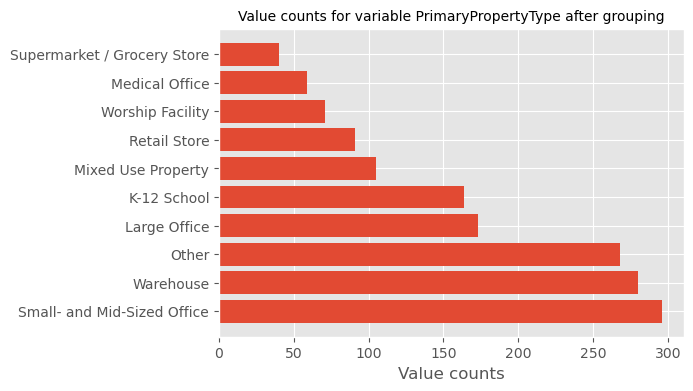

In [18]:
# Les nombres de chaque valeur dans PrimaryPropertyType
plt.style.use('ggplot')
plt.figure(figsize=(6, 4))
plt.barh(y=(
    df_non_residential.PrimaryPropertyType.value_counts()).index,
    width=(df_non_residential.PrimaryPropertyType.value_counts()).values,
)
plt.xlabel('Value counts')
plt.title('Value counts for variable PrimaryPropertyType after grouping', fontsize=10)
plt.savefig("barh_plot_primarypropertytype_value_counts_after",dpi=300,bbox_inches = 'tight')
plt.show()

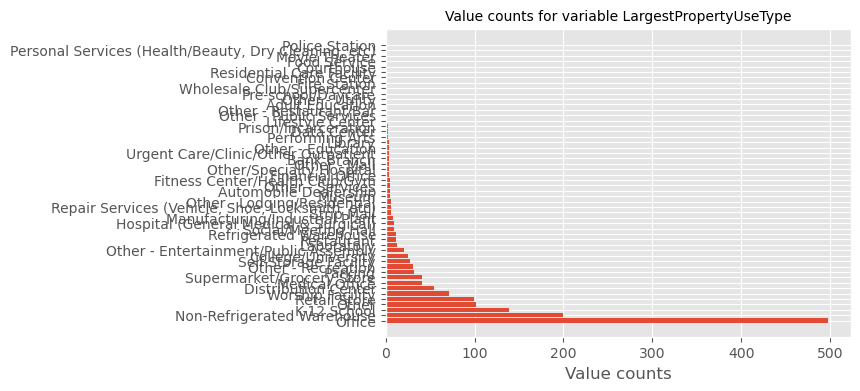

In [19]:
# Verifier les nombres de chaque valeur dans LargestPropertyUseType
plt.figure(figsize=(6, 4))
plt.barh(y=(
    df_non_residential.LargestPropertyUseType.value_counts()).index,
    width=(df_non_residential.LargestPropertyUseType.value_counts()).values,
)
plt.xlabel('Value counts')
plt.title('Value counts for variable LargestPropertyUseType', fontsize=10)
plt.savefig("barh_plot_LargestPropertyUseType_value_counts_before",dpi=300,bbox_inches = 'tight')
plt.show()

In [20]:
# Trouver des valeurs dans LargestPropertyUseType qui apparaît moins de 30 fois
count_over_30 = df_non_residential.LargestPropertyUseType.value_counts() < 30
count_over_30 = count_over_30.loc[count_over_30.values == True].index.to_list()

# Remplacez les valeurs ci-dessus par "Other"
df_non_residential.LargestPropertyUseType.replace(count_over_30, 'Other', inplace=True)

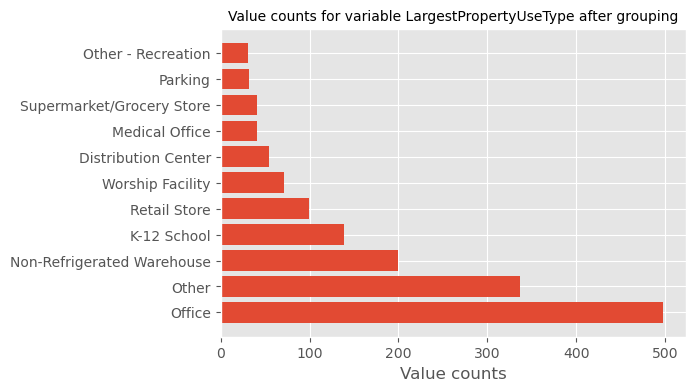

In [21]:
# Les nombres de chaque valeur dans LargestPropertyUseType
plt.figure(figsize=(6, 4))
plt.barh(y=(
    df_non_residential.LargestPropertyUseType.value_counts()).index,
    width=(df_non_residential.LargestPropertyUseType.value_counts()).values,
)
plt.xlabel('Value counts')
plt.title('Value counts for variable LargestPropertyUseType after grouping', fontsize=10)
plt.savefig("barh_plot_LargestPropertyUseType_value_counts_after",dpi=300,bbox_inches = 'tight')
plt.show()

## Parking GFA
Comme la consommation d'énergie et les émissions de CO2 sont faibles dans les parkings. Les bâtiments qui ont de grandes surfaces de parking fausseront l'analyse. Ils seront supprimés.

In [22]:
# Calculer la proportion de surface de parking
parking_proportion = df_non_residential.PropertyGFAParking / df_non_residential.PropertyGFATotal

# Supprimer les bâtiments dont plus de 60 % de la surface  de parking.
df_non_residential.drop(index=parking_proportion[parking_proportion > 0.6].index, inplace=True)

## Valeurs aberrantes

La variable *ComplianceStatus* indique si le benchmarking du bâtiment est conforme à la conformité. Les bâtiments qui ne sont pas conformes donnent un enregistrement de données peu fiable et doivent donc être supprimés.

Selon le site Seattle Energy Benchmarking :
> *Reports with unusually low or high (outlier) EUIs or other errors will be flagged for accuracy and required to make corrections.* <br>


In [23]:
# Vérifier les valeurs dans la variable ComplianceStatus
df_non_residential.ComplianceStatus.value_counts(dropna=False)

Compliant                       1414
Error - Correct Default Data      88
Non-Compliant                     16
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [24]:
# Enlever les bâtiments Non-Compliant
non_compliant = df_non_residential[df_non_residential["ComplianceStatus"] == "Non-Compliant"]
df_non_residential.drop(index=non_compliant.index, inplace=True)

Recherche des bâtiments restants marqués comme outlier.

In [25]:
df_non_residential.Outlier.value_counts(dropna=False)

NaN            1515
Low outlier       2
Name: Outlier, dtype: int64

In [26]:
# Supprimer les lignes signalées comme outliers
df_non_residential.drop(
    index=df_non_residential[~df_non_residential["Outlier"].isna()].index, inplace=True
)

Étant donné que cet jeu de données enregistre la consommation d'énergie et les émissions de CO2, toute valeur inférieure à zéro n'est pas normale.

In [27]:
# Recherche de valeurs négatives.
(df_non_residential.select_dtypes(exclude=["object"]) < 0).sum()

OSEBuildingID                         0
ZipCode                               0
CouncilDistrictCode                   0
Latitude                              0
Longitude                          1515
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  1
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kWh)                      1
Electricity(kBtu)                     1
NaturalGas(therms)                    0


Outre la variable *Longitude*, cinq variables contiennent des valeurs négatives. Ils seront supprimés.

In [28]:
# Eliminer les bâtiments à consommation et émission négatives
negative = df_non_residential.loc[
    (df_non_residential["SourceEUIWN(kBtu/sf)"] < 0)
    | (df_non_residential["Electricity(kWh)"] < 0)
    | (df_non_residential["Electricity(kBtu)"] < 0)
    | (df_non_residential["TotalGHGEmissions"] < 0)
    | (df_non_residential["GHGEmissionsIntensity"] < 0)
]
negative

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3206,49784,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,0,52000,Office,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,NaN,Compliant,NaN,-0.8,-0.02


In [29]:
df_non_residential.drop(index=negative.index, inplace=True)

## Outliers
Ici, je recherche des valeurs trop élevées et les traite en fonction de la nature de leurs valeurs élevées.

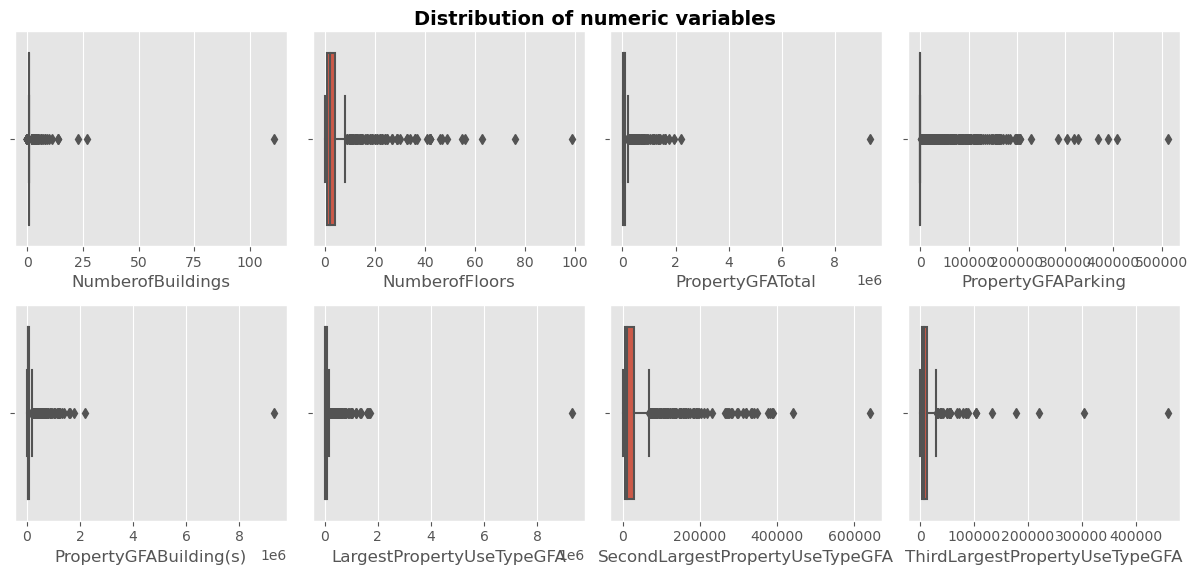

In [30]:
# Plot ces variables avec des plots de moustache pour repérer les valeurs aberrantes potentielles.
columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
           'PropertyGFAParking', 'PropertyGFABuilding(s)',
           'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseTypeGFA']

figure, axes = plt.subplots(
    round(len(columns) / 4), 4, sharex=False, figsize=(12, 6)
)
y = 0
for col in columns:
    i, j = divmod(y, 4)
    sns.boxplot(x=df_non_residential[col], ax=axes[i, j])
    y = y + 1
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle("Distribution of numeric variables",
             fontsize=14, fontweight="bold")
plt.savefig('boxplot_outlier', dpi=300)
plt.show()

Il y a des valeurs extrêmement larges dans les variables *NumberofBuildings*, *NumberofFloors*, *PropertyGFATotal*, etc.

In [31]:
# Rechercher des outlier dans le variable NumberofBuildings
df_non_residential.loc[df_non_residential.NumberofBuildings ==
                       df_non_residential.NumberofBuildings.max()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,K-12 School,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,Other,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


L'Université de Washington, bien que grande, peut contient 111 bâtiments.

In [32]:
# Rechercher des bâtiments de plus de 50 étages
df_non_residential[df_non_residential.NumberofFloors > 50]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
233,357,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,98104.0,0942000720,3,DOWNTOWN,47.60501,-122.32988,1990,1.0,63,1354987,159600,1195387,Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.000,18046946.0,61576180.0,0.00000,0.0,False,NaN,Compliant,NaN,429.27,0.32
271,399,Large Office,1201 Third Avenue,1201 3rd ave,98101.0,1974700120,7,DOWNTOWN,47.60723,-122.33611,1988,1.0,55,1400000,285000,1115000,Office,994116.0,Parking,264481.0,Other,133598.0,2017201120102007,92.0,46.700001,48.500000,140.199997,145.300003,5.307916e+07,5.514030e+07,2179487.750,14499658.0,49472833.0,14268.40039,1426840.0,False,NaN,Compliant,NaN,588.90,0.42
292,422,Large Office,Two Union Square,601 Union St.,98101.0,1976700125,7,DOWNTOWN,47.61043,-122.33206,1989,1.0,56,1605578,389860,1215718,Office,1314475.0,Parking,389860.0,Other,30744.0,20092005,97.0,36.799999,37.900002,110.300003,113.300003,4.951770e+07,5.098450e+07,915654.875,13505807.0,46081813.0,25202.29883,2520230.0,False,NaN,Compliant,NaN,525.78,0.33
559,775,Large Office,Columbia Center - 2015,701 5th Avenue,98104.0,0942000640,7,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,Office,1680937.0,Parking,319368.0,NaN,NaN,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.000,25747908.0,87851862.0,50857.63281,5085763.0,False,NaN,Compliant,NaN,882.56,0.45
1359,21611,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,98108.0,2124049098,2,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,0,21948,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.000,95545.5,326001.0,0.00000,0.0,False,NaN,Compliant,NaN,2.27,0.10


In [33]:
# Le nombre d'étages de 'Seattle Chinese Baptist Church' devrait être de 2, selon la recherche en ligne.
df_non_residential.loc[
    df_non_residential["PropertyName"] == "Seattle Chinese Baptist Church",
    "NumberofFloors",
] = 2

In [34]:
# Chercher la plus grande valeur en surface de propriété.
df_non_residential.loc[df_non_residential['PropertyGFATotal']
                       == df_non_residential['PropertyGFATotal'].max()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,K-12 School,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,Other,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2


L'Université de Washington - Campus de Seattle est une grande propriété. Bien qu'il s'agisse d'une valeur élevée, il s'agit d'une entrée valide. Après quelques essais, il s'avère que la suppression de ce  batiment n'améliore pas le résultat.

## Valeurs atypiques

In [35]:
# Rechercher des valeurs atypiques pour la variable YearBuilt
np.sort(df_non_residential.YearBuilt.unique())

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015], dtype=int64)

In [36]:
df_non_residential['Neighborhood'].value_counts()

GREATER DUWAMISH          339
DOWNTOWN                  302
MAGNOLIA / QUEEN ANNE     141
LAKE UNION                131
EAST                      107
NORTHEAST                 104
NORTHWEST                  76
BALLARD                    62
NORTH                      55
CENTRAL                    47
SOUTHEAST                  43
DELRIDGE                   42
SOUTHWEST                  39
North                       8
Ballard                     6
Delridge                    4
Northwest                   4
Central                     3
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

Le quartier delridge est représenté deux fois. Corriger l'un d'eux

In [37]:
df_non_residential['Neighborhood'].replace({"delridge neighborhoods":'delridge'},inplace=True)

## Valeurs a zero

In [38]:
# Nombre des valeurs nulles par variable
df_nulle = (df_non_residential == 0).sum().to_frame().reset_index()
df_nulle.columns=['variable','counts']

<Figure size 600x400 with 0 Axes>

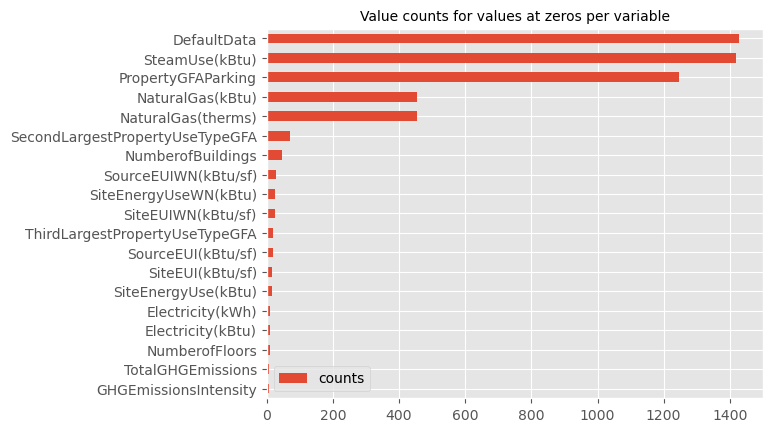

In [39]:
plt.figure(figsize=(6, 4))
zero_plot = df_nulle[df_nulle.counts != 0].sort_values(
    by='counts', ascending=True)

zero_plot.plot(kind='barh', y="counts", x="variable")
plt.xlabel(None)
plt.ylabel(None)
plt.title('Value counts for values at zeros per variable', fontsize=10)
plt.savefig("barh_plot_zero_value_counts",dpi=300,bbox_inches = 'tight')
plt.show()

Pour les variables PropertyGFAParking, SteamUse, NaturalGas et Electricity, il est plausible qu'ils aient des valeurs nulles, puisqu'un bâtiment peut ne pas avoir d'aire de stationnement, ou ne pas consommer de vapeur/gaz/électricité. Je laisserai ces valeurs zéro intactes.

La présence de valeurs nulles est anormale pour ces variables: 
- NumberofBuildings
- SiteEUI(kBtu/sf)
- SiteEUIWN(kBtu/sf)
- SourceEUI(kBtu/sf)
- SourceEUIWN(kBtu/sf)
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- TotalGHGEmissions 
- GHGEmissionsIntensity

In [40]:
# Remplacement des valeurs nulles par les valeurs moyennes des variables NumberofBuildings et NumberofFloors
df_non_residential[["NumberofBuildings", "NumberofFloors"]] = df_non_residential[
    ["NumberofBuildings", "NumberofFloors"]
].replace(0, df_non_residential[["NumberofBuildings", "NumberofFloors"]].mean())

In [41]:
# Chercher des ligns avec zero consumption d'energie et zero emmision
consumption_zero = df_non_residential[
    df_non_residential["SiteEUI(kBtu/sf)"] == 0
].copy()

emission_zero = df_non_residential[
    df_non_residential["TotalGHGEmissions"] == 0
].copy()


# Les bâtiments qui n'ont pas de consommation et/ou d'émission n'aideront pas les performances de notre modèle. 
# Ils seront éliminés.
df_non_residential.drop(index=np.concatenate([consumption_zero.index,emission_zero.index]),inplace=True)

## Valeurs manquantes

In [42]:
# Chercher des valeurs manquantes
nan = df_non_residential.isnull().sum().to_frame().reset_index()
nan.columns = ['variable', 'counts']
nan = nan[nan.counts != 0].sort_values(by='counts')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x400 with 0 Axes>

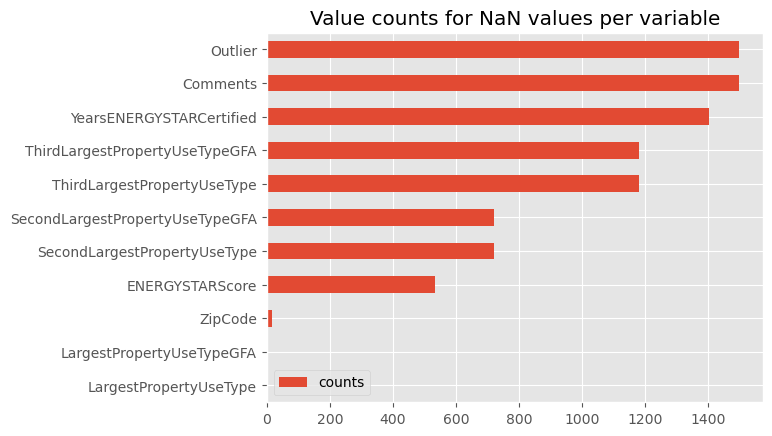

In [43]:
plt.figure(figsize=(6, 4))
nan.plot(kind='barh', y='counts', x='variable')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Value counts for NaN values per variable')
plt.savefig("barh_plot_nan_values", dpi=300, bbox_inches='tight')
plt.show

Les seules variables à traiter ici sont ZipCode, LargestPropertyUseTypeGFA et LargestPropertyUseType. Le reste ne sera pas traité car ils ne seront pas utilisés pour notre analyse ou notre modélisation (en raison de la quantité de valeur manquante dont ils disposent).

### ZipCode
Les codes postaux manquants sont remplacés par le code postal le plus fréquent du même quartier

In [44]:
# Unifier le format string de la variable Neighborhood
df_non_residential.Neighborhood = df_non_residential.Neighborhood.str.lower()

In [45]:
# Chercher les zip code le plus fréquent du chacque quartier
neighborhood_zipcode = (
    df_non_residential.groupby(["Neighborhood", "ZipCode"])["Neighborhood"]
    .count()
    .to_frame()
)
neighborhood_zipcode.columns = ["count"]
neighborhood_zipcode.reset_index("ZipCode", inplace=True)
neighborhood_zipcode.max(level=0)

C:\Users\zheng\AppData\Local\Temp\ipykernel_30132\1203920652.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  neighborhood_zipcode.max(level=0)


,ZipCode,count
Neighborhood,,
ballard,98134.0,47
central,98144.0,29
delridge,98146.0,24
downtown,98191.0,111
east,98136.0,55
greater duwamish,98199.0,174
lake union,98109.0,63
magnolia / queen anne,98199.0,59
north,98165.0,41


In [46]:
# Chercher les zip code manquantes et leurs quartiers
df_non_residential[df_non_residential["ZipCode"].isna()]["Neighborhood"]

3360                     north
3361                   central
3362                   ballard
3363                     north
3364                   ballard
3365                   ballard
3366     magnolia / queen anne
3367                      east
3368                   central
3369                 southeast
3370    delridge neighborhoods
3371          greater duwamish
3372                  downtown
3373     magnolia / queen anne
3374          greater duwamish
3375          greater duwamish
Name: Neighborhood, dtype: object

In [47]:
# Créer un dictionnaire pour ZipCode/Neighborhood.
zip_dict = {
    "north": 98165,
    "central": 98144,
    "ballard": 98134,
    "magnolia / queen anne": 98199,
    "east": 98136,
    "southeast": 98178,
    "delridge neighborhoods": 98146,
    "greater duwamish": 98199,
    "downtown": 98191,
}

In [48]:
# Remplir le code postal manquant
df_non_residential.ZipCode = df_non_residential.ZipCode.fillna(
    df_non_residential.Neighborhood.map(zip_dict)
)

In [49]:
df_non_residential.ZipCode = df_non_residential.ZipCode.astype("int").astype("str")

### Property Use Type

In [50]:
# Chercher des valeurs manquantes dans la variable LargestPropertyUseType
df_non_residential[df_non_residential.LargestPropertyUseType.isna()]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
353,496,Warehouse,Market St Center,2811 NW Market Street,98107,1175001235,6,ballard,47.66838,-122.39310,1946,2.0,2.0,111445,0,111445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.799999,51.000000,103.000000,106.400002,5.697472e+06,6.076957e+06,0.0,881452.0000,3007514.0,26899.582030,2689958.0,False,NaN,Compliant,NaN,163.83,1.47
2414,25568,Small- and Mid-Sized Office,Talon Northlake LLC,1341 N Northlake Way,98103,4088804565,4,lake union,47.64747,-122.34086,2008,1.0,4.0,48350,0,48350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,72.199997,74.699997,226.600006,234.600006,3.168131e+06,3.280956e+06,0.0,928526.0000,3168131.0,0.000000,0.0,False,NaN,Compliant,NaN,22.09,0.46
2459,25711,Other,BUSH GARDEN - RESTURANT & LOUNGE,614 S MAYNARD AVE S,98104,5247802410,2,downtown,47.59697,-122.32474,1913,1.0,3.0,28800,0,28800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.200001,32.500000,62.000000,62.799999,8.999242e+05,9.358332e+05,0.0,118085.2969,402907.0,4970.169922,497017.0,False,NaN,Compliant,NaN,29.21,1.01


In [51]:
# saisir manuellement les valeurs
df_non_residential.loc[353, "LargestPropertyUseType"] = "Non-Refrigerated Warehouse"
df_non_residential.loc[2414, "LargestPropertyUseType"] = "Office"
df_non_residential.loc[2459, "LargestPropertyUseType"] = "Other"

In [52]:
# Remplir la plus grande surface de propriété manquante avec la surface totale
df_non_residential.LargestPropertyUseTypeGFA.fillna(
    df_non_residential["PropertyGFATotal"], inplace=True
)

## ENERGYStarScore
La variable ENERGYStarScore est le plus influencé par le type d'utilisation du bâtiment (selon leur site Web). Je compléterai donc les valeurs manquantes par la moyenne par type de bâtiment.

In [53]:
df_non_residential['ENERGYSTARScore'] = df_non_residential['ENERGYSTARScore'].fillna(
    df_non_residential.groupby('PrimaryPropertyType')['ENERGYSTARScore'].transform('mean'))

# Feature enginerring

In [54]:
df_final = df_non_residential.copy()

## Ajouter de nouvelles variables

In [55]:
# New variable: buildings' age
from datetime import datetime

df_final["BuildingAge"] = datetime.now().year - df_final["YearBuilt"]
df_final.drop(columns=["YearBuilt"], inplace=True)

# Nouvelle variable : pourcentage de parking dans la surface totale
df_final["parking_area_prcnt"] = (
    df_final["PropertyGFAParking"] / df_final["PropertyGFATotal"]
)

# Nouvelle variable : pourcentage de la plus grande surface de propriété dans la surface totale du bâtiment
df_final["largest_property_GFA_prcnt"] = (
    df_final["LargestPropertyUseTypeGFA"] / df_final["PropertyGFABuilding(s)"]
)


In [56]:
# Les variables Electricity(kWh) et NaturalGas(therms) seront enlevées
# car ces informations sont déjà présentes dans les données (en unité kBtu).
df_final.drop(columns=["Electricity(kWh)", "NaturalGas(therms)"], inplace=True)

## Log transformation

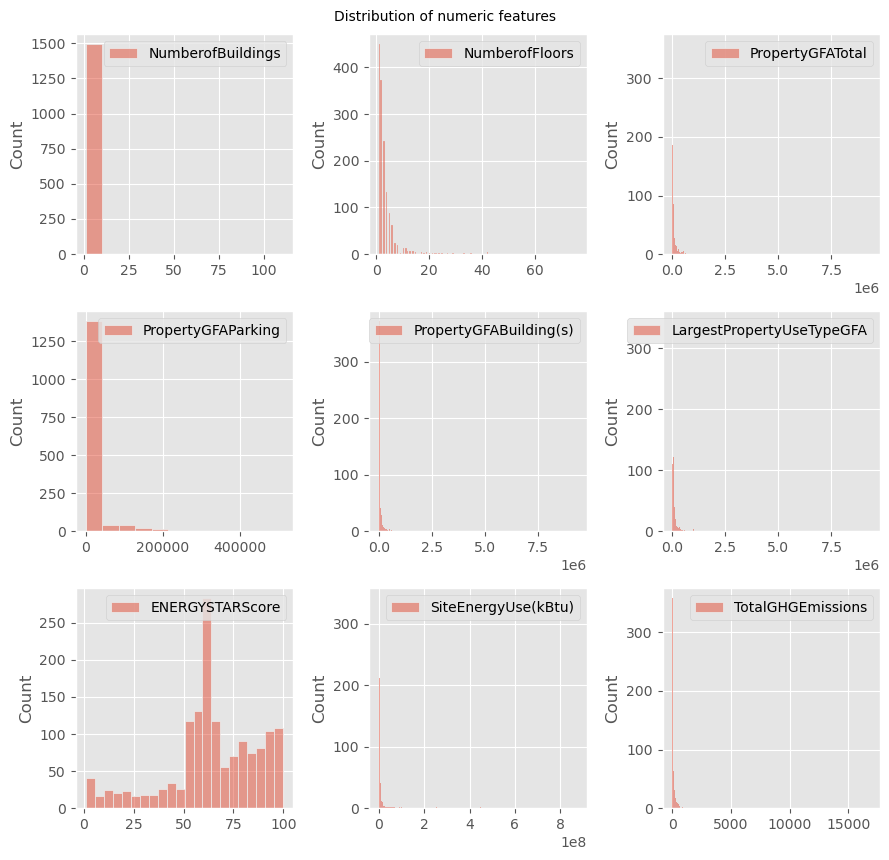

In [57]:
var_numeric = df_final[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                        'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
                        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()

figure, axes = plt.subplots(3, 3,
                            sharex=False, figsize=(9, 9))
y = 0
for var in var_numeric.columns:
    i, j = divmod(y, 3)
    variable = df_final[[var]]
    sns.histplot(variable, ax=axes[i, j])
    y = y + 1
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle('Distribution of numeric features', fontsize=10)
plt.savefig('histplot_skewed_features',bbox_inches='tight',dpi=300)
plt.show()

In [58]:
# Transformez certains variables asymétriques en logarithme naturel.
skewed_features = ["PropertyGFATotal",
                   "PropertyGFABuilding(s)",
                   'LargestPropertyUseTypeGFA',
                   'TotalGHGEmissions',
                   'SiteEnergyUse(kBtu)'
                   ]

features_log = ["PropertyGFATotal_log",
                "PropertyGFABuilding(s)_log",
                'LargestPropertyUseTypeGFA_log',
                'TotalGHGEmissions_log',
                'SiteEnergyUse(kBtu)_log'
                ]

for feature, logged in zip(skewed_features, features_log):
    df_final[logged] = np.log(df_final[feature])

In [59]:
df_final.drop(index=df_final[df_final.TotalGHGEmissions_log < 0].index,inplace=True)

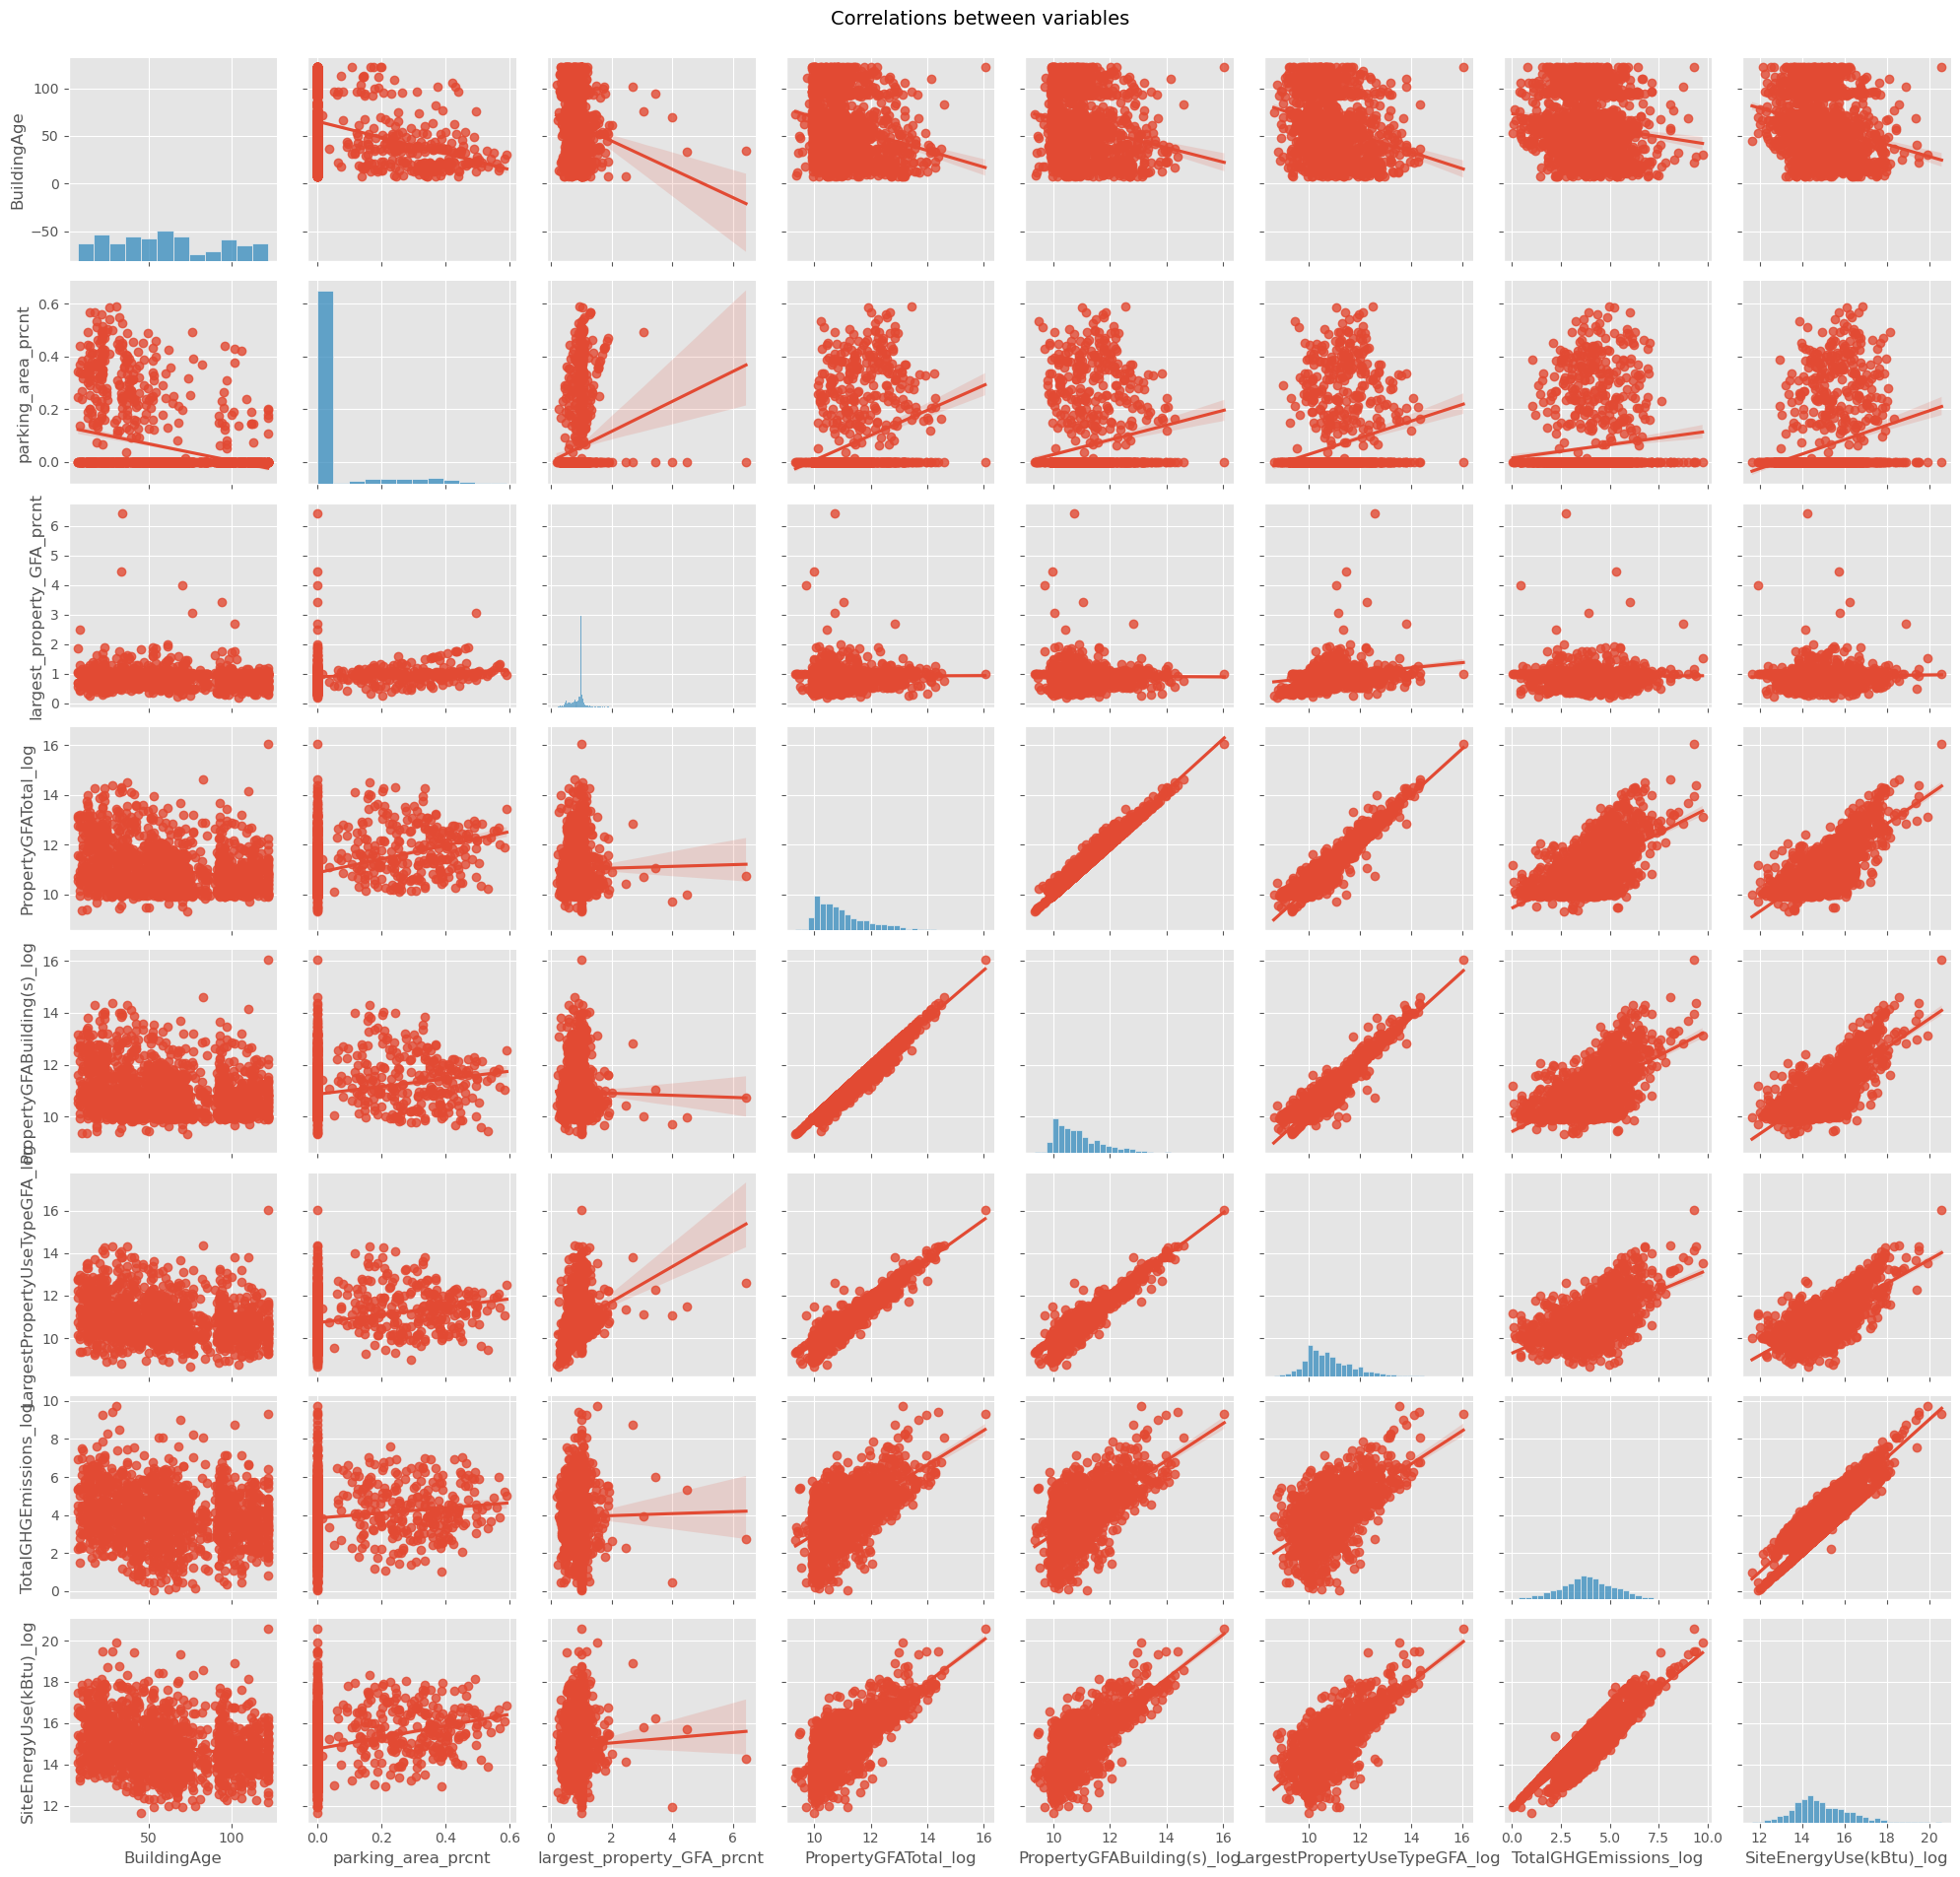

In [60]:
#Examinez les relations entre les caractéristiques et les variables cibles, 
# en prévision de la sélection d'un type de modèle.
var_corr = [
    'BuildingAge',
    'parking_area_prcnt',
    'largest_property_GFA_prcnt',
    'PropertyGFATotal_log',
    'PropertyGFABuilding(s)_log',
    'LargestPropertyUseTypeGFA_log',
    'TotalGHGEmissions_log',
    'SiteEnergyUse(kBtu)_log']

sns.pairplot(df_final[var_corr],kind='reg')
plt.suptitle('Correlations between variables',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('pairplot', bbox_inches='tight', dpi=300)
plt.show()

In [61]:
df_final.shape

(1487, 46)

In [62]:
# df_final.to_csv('df_final.csv', index=False)